# Plot Confusion Matrices

### This script takes preprocessed quality data for all classifiers and plots average confusion matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set to Latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')

In [3]:
# load the preprocessed quality data
df = pd.read_csv(r"C:\Users\MS\OneDrive\Studium\Geographie\Geo-BA\Data\Classification\Quality\Quality_7K_with_metrics.csv", delimiter = ',')

In [4]:
df.columns

Index(['cm_1_1', 'cm_1_2', 'cm_1_3', 'cm_1_4', 'cm_1_5', 'cm_1_6', 'cm_1_7',
       'cm_2_1', 'cm_2_2', 'cm_2_3', 'cm_2_4', 'cm_2_5', 'cm_2_6', 'cm_2_7',
       'cm_3_1', 'cm_3_2', 'cm_3_3', 'cm_3_4', 'cm_3_5', 'cm_3_6', 'cm_3_7',
       'cm_4_1', 'cm_4_2', 'cm_4_3', 'cm_4_4', 'cm_4_5', 'cm_4_6', 'cm_4_7',
       'cm_5_1', 'cm_5_2', 'cm_5_3', 'cm_5_4', 'cm_5_5', 'cm_5_6', 'cm_5_7',
       'cm_6_1', 'cm_6_2', 'cm_6_3', 'cm_6_4', 'cm_6_5', 'cm_6_6', 'cm_6_7',
       'cm_7_1', 'cm_7_2', 'cm_7_3', 'cm_7_4', 'cm_7_5', 'cm_7_6', 'cm_7_7',
       'filename', 'classifier', 'date', 'accuracy', 'kappa', 'fscore'],
      dtype='object')

In [5]:
df_cart = df[df['classifier'] == 'CART']
df_rf = df[df['classifier'] == 'RF']
df_svm = df[df['classifier'] == 'SVM']
df_knn = df[df['classifier'] == 'KNN']
df_gbt = df[df['classifier'] == 'GBT']
df_cons = df[df['classifier'] == 'Cons']

In [6]:
def get_conf_mat(row_number, result_df):
  row = result_df.iloc[row_number]

  num_classes = 7
  confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

  for i in range(1, num_classes + 1):
    for j in range(1, num_classes + 1):
      confusion_matrix[i-1, j-1] = row[f'cm_{i}_{j}']

  return confusion_matrix

In [7]:
mat = get_conf_mat(1, df)
print(mat)

[[343   0   4   0   0   0   4]
 [  0   6   0   0   0   0   0]
 [  1   0 335   0   8   0   3]
 [  6   0   0 317   0   0   0]
 [  0   0   0   0 310   0   1]
 [ 24  11  39  13 122  49  79]
 [  5   0  14   0   0   0 306]]


In [8]:
# Steht gerade auf []
confusion_matrices = [get_conf_mat(i, df) for i in range(len(df))]

# Plot the overall mean of the classes

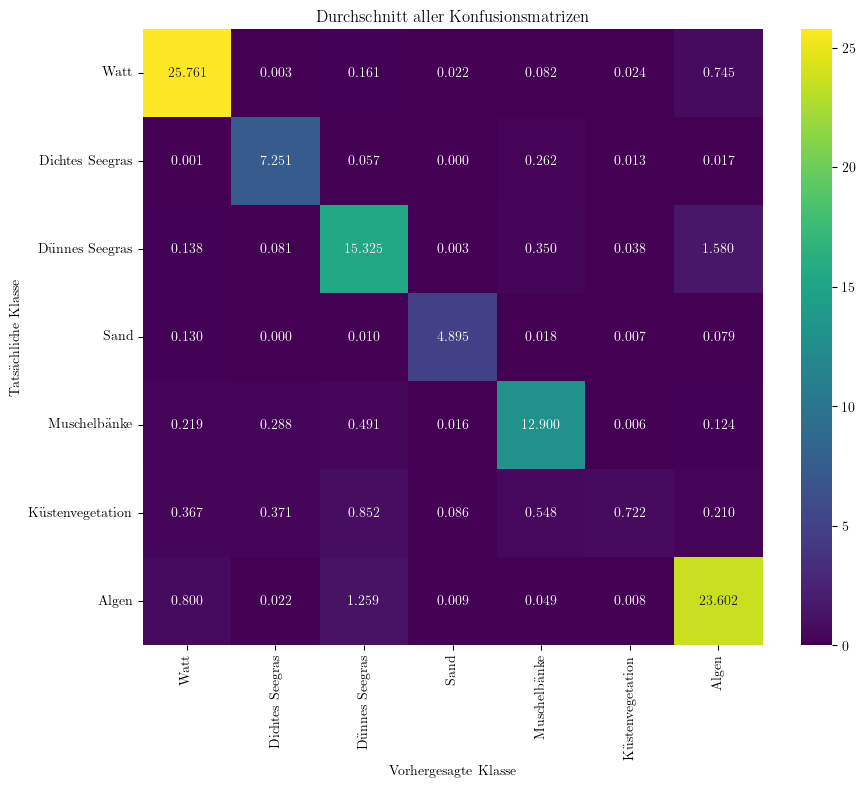

In [9]:
def calculate_cell_proportions(confusion_matrices):
    proportions = [matrix / np.sum(matrix) for matrix in confusion_matrices]

    proportions_array = np.array(proportions)

    mean_proportions = np.mean(proportions_array, axis=0)

    return mean_proportions

mean_proportions = calculate_cell_proportions(confusion_matrices)

mean_proportions = 100 * mean_proportions

plt.figure(figsize=(10, 8))
sns.heatmap(mean_proportions, annot=True, cmap='viridis', fmt='.3f', cbar=True,
            xticklabels=['Watt', 'Dichtes Seegras', 'Dünnes Seegras', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen'], yticklabels=['Watt', 'Dichtes Seegras', 'Dünnes Seegras', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen'])
plt.title('Durchschnitt aller Konfusionsmatrizen')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

# Compute overall standard deviation

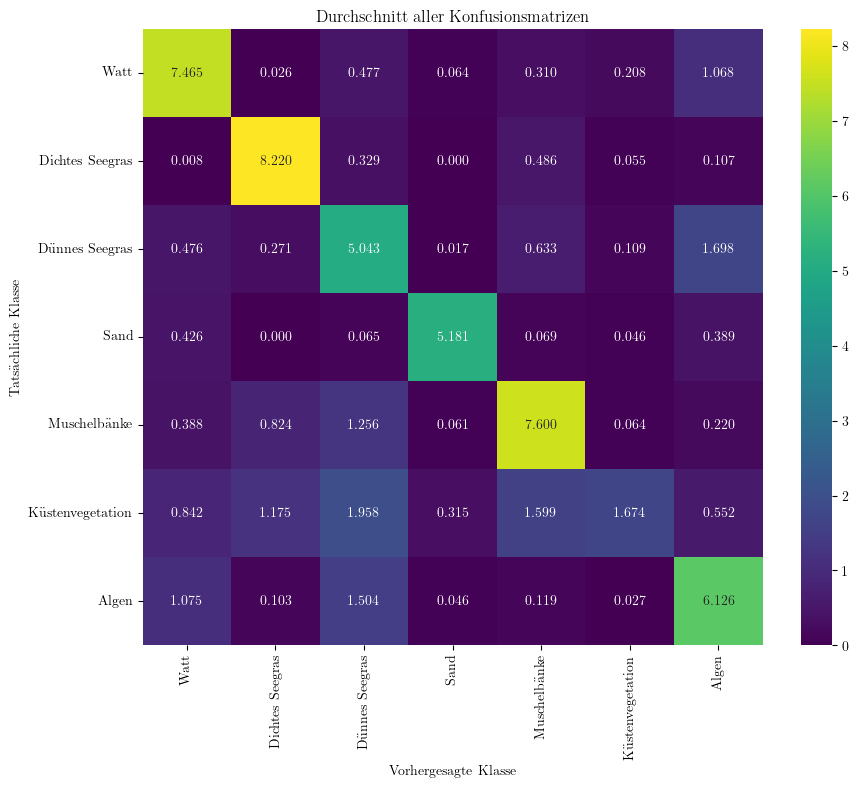

In [10]:
def calculate_cell_proportions(confusion_matrices):
    proportions = [matrix / np.sum(matrix) for matrix in confusion_matrices]

    proportions_array = np.array(proportions)

    std_proportions = np.std(proportions_array, axis=0)

    return std_proportions

std_proportions = calculate_cell_proportions(confusion_matrices)

std_proportions = 100 * std_proportions

plt.figure(figsize=(10, 8))
sns.heatmap(std_proportions, annot=True, cmap='viridis', fmt='.3f', cbar=True,
            xticklabels=['Watt', 'Dichtes Seegras', 'Dünnes Seegras', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen'], yticklabels=['Watt', 'Dichtes Seegras', 'Dünnes Seegras', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen'])
plt.title('Durchschnitt aller Konfusionsmatrizen')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

# Define all required functions together (you can also start the script here)

In [11]:
def get_conf_mat(row_number, result_df):
  row = result_df.iloc[row_number]

  num_classes = 7
  confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

  for i in range(1, num_classes + 1):
    for j in range(1, num_classes + 1):
      confusion_matrix[i-1, j-1] = row[f'cm_{i}_{j}']

  return confusion_matrix

def calculate_row_proportions_mean(confusion_matrices):
    proportions = []

    for matrix in confusion_matrices:
        row_sums = np.sum(matrix, axis=1).reshape(-1, 1)

        with np.errstate(divide='ignore', invalid='ignore'):
            row_proportions = np.divide(matrix, row_sums, where=row_sums!=0)

        row_proportions[row_sums.flatten() == 0] = np.nan
        proportions.append(row_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

def calculate_row_proportions_std(confusion_matrices):
    proportions = []
    for matrix in confusion_matrices:
        row_sums = np.sum(matrix, axis=1).reshape(-1, 1)

        with np.errstate(divide='ignore', invalid='ignore'):
            row_proportions = np.divide(matrix, row_sums, where=row_sums!=0)

        row_proportions[row_sums.flatten() == 0] = np.nan
        proportions.append(row_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanstd(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

def calculate_column_proportions_mean(confusion_matrices):
    proportions = []
    for matrix in confusion_matrices:
        col_sums = np.sum(matrix, axis=0).reshape(1, -1)

        with np.errstate(divide='ignore', invalid='ignore'):
            col_proportions = np.divide(matrix, col_sums, where=col_sums!=0)

        col_proportions[:, col_sums.flatten() == 0] = np.nan
        proportions.append(col_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

def calculate_column_proportions_std(confusion_matrices):
    proportions = []
    for matrix in confusion_matrices:
        col_sums = np.sum(matrix, axis=0).reshape(1, -1)

        with np.errstate(divide='ignore', invalid='ignore'):
            col_proportions = np.divide(matrix, col_sums, where=col_sums!=0)

        col_proportions[:, col_sums.flatten() == 0] = np.nan
        proportions.append(col_proportions)

    proportions_array = np.array(proportions)
    std_proportions = np.nanstd(proportions_array, axis=0)

    std_proportions = np.nan_to_num(std_proportions)

    return std_proportions

In [1]:
# compute heatmap comfusion matrices for each classifier containing the overall values and the standard deviation
def heatmaps(df):
  classifier_list = ['CART', 'RF', 'SVM', 'KNN', 'GBT', 'Cons']
  filtered_dfs = {}

  for classi in classifier_list:
    filtered_dfs[f'df_{classi}'] = df[df['classifier'] == classi]

  for key, dataframe in filtered_dfs.items():
    confusion_matrices = [get_conf_mat(i, dataframe) for i in range(len(dataframe))]

    mat_dict = {}

    mean_proportions_row = calculate_row_proportions_mean(confusion_matrices) * 100
    mat_dict[1] = mean_proportions_row

    std_proportions_row = calculate_row_proportions_std(confusion_matrices) * 100
    mat_dict[2] = std_proportions_row

    mean_proportions_col = calculate_column_proportions_mean(confusion_matrices) * 100
    mat_dict[3] = mean_proportions_col

    std_proportions_col = calculate_column_proportions_std(confusion_matrices) * 100
    mat_dict[4] = std_proportions_col

    mat_names = ['Zeilenmittelwert der Konfusionsmatrizen',
                  'Zeilenstandardabweichungs der Konfusionsmatrizen',
                  'Spaltenmittelwert der Konfusionsmatrizen',
                  'Spaltenstandardabweichung der Konfusionsmatrizen']

    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    axs = axs.flatten()

    for idx, (name, mat) in enumerate(zip(mat_names, mat_dict.values())):
        sns.heatmap(mat, annot=True, cmap='viridis', fmt='.3f', cbar=True,
                    xticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'],
                    yticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'],
                    ax=axs[idx])
        axs[idx].set_title(f'{name} of {key}')
        axs[idx].set_xlabel('Vorhergesagte Klasse')
        axs[idx].set_ylabel('Tatsächliche Klasse')

    plt.subplots_adjust(hspace=0.7, wspace=0.35, right=0.85, bottom=0.01, top=0.99)
    plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.99])
    plt.savefig(f'{key}_Heatmaps.pdf')
    plt.show()

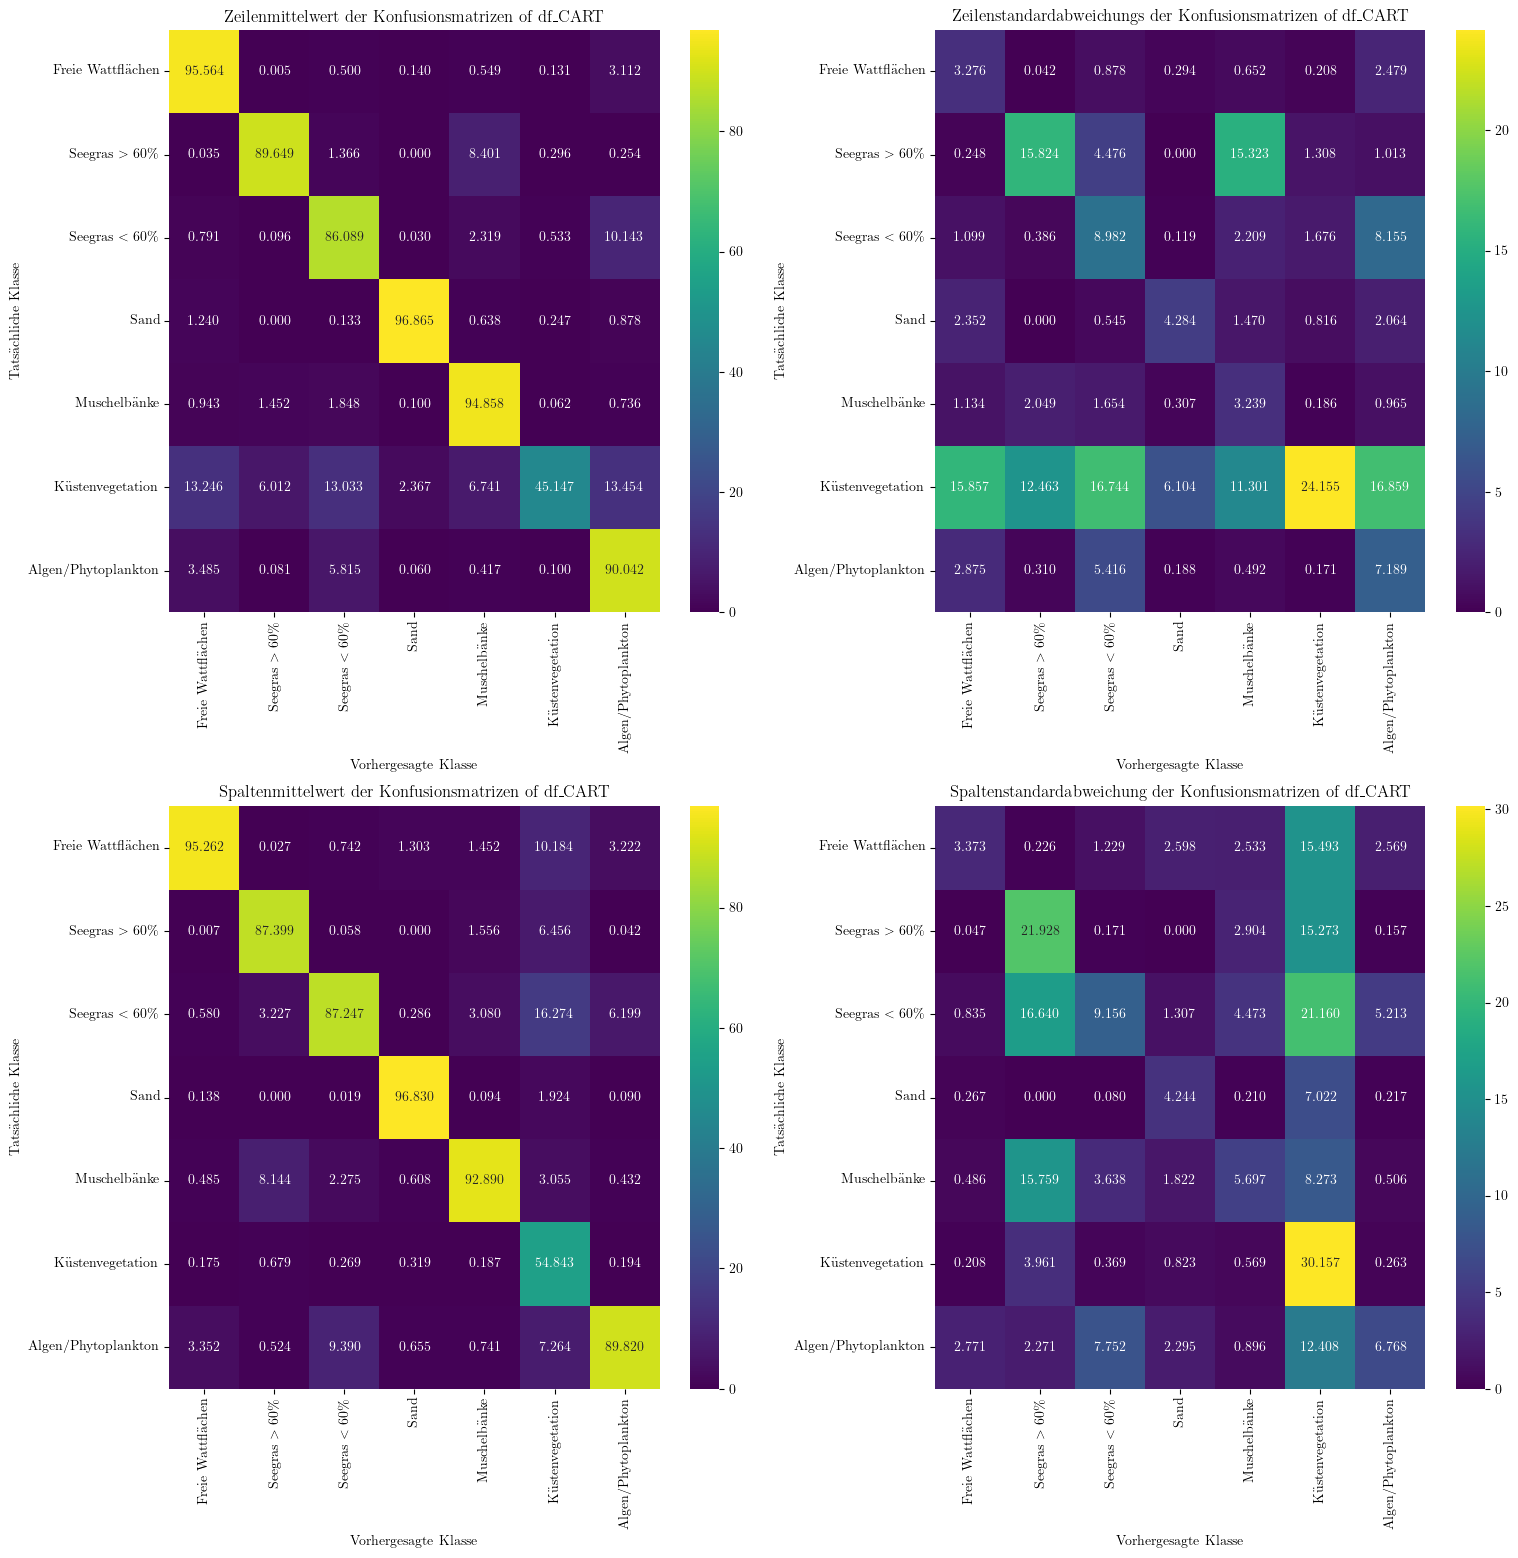

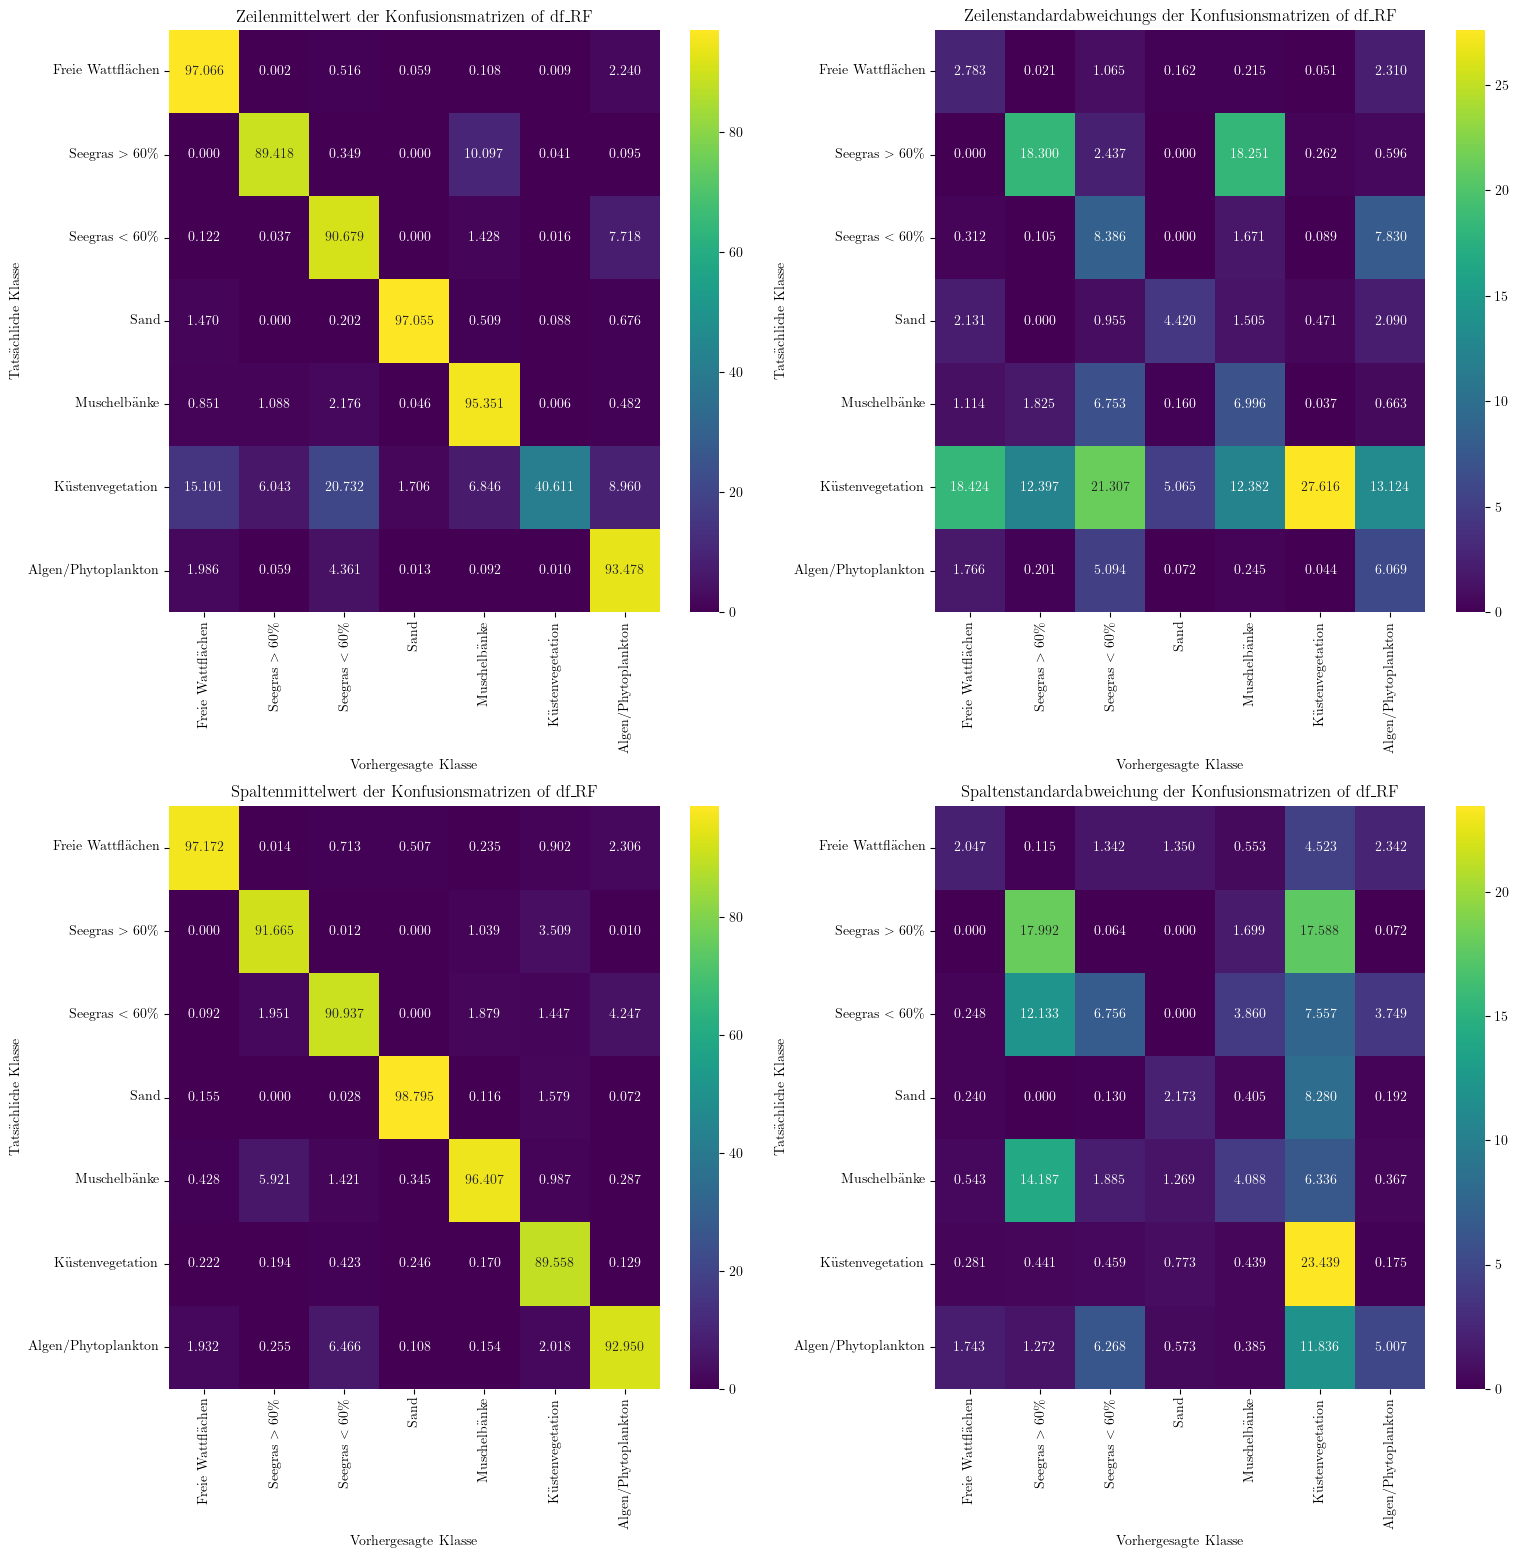

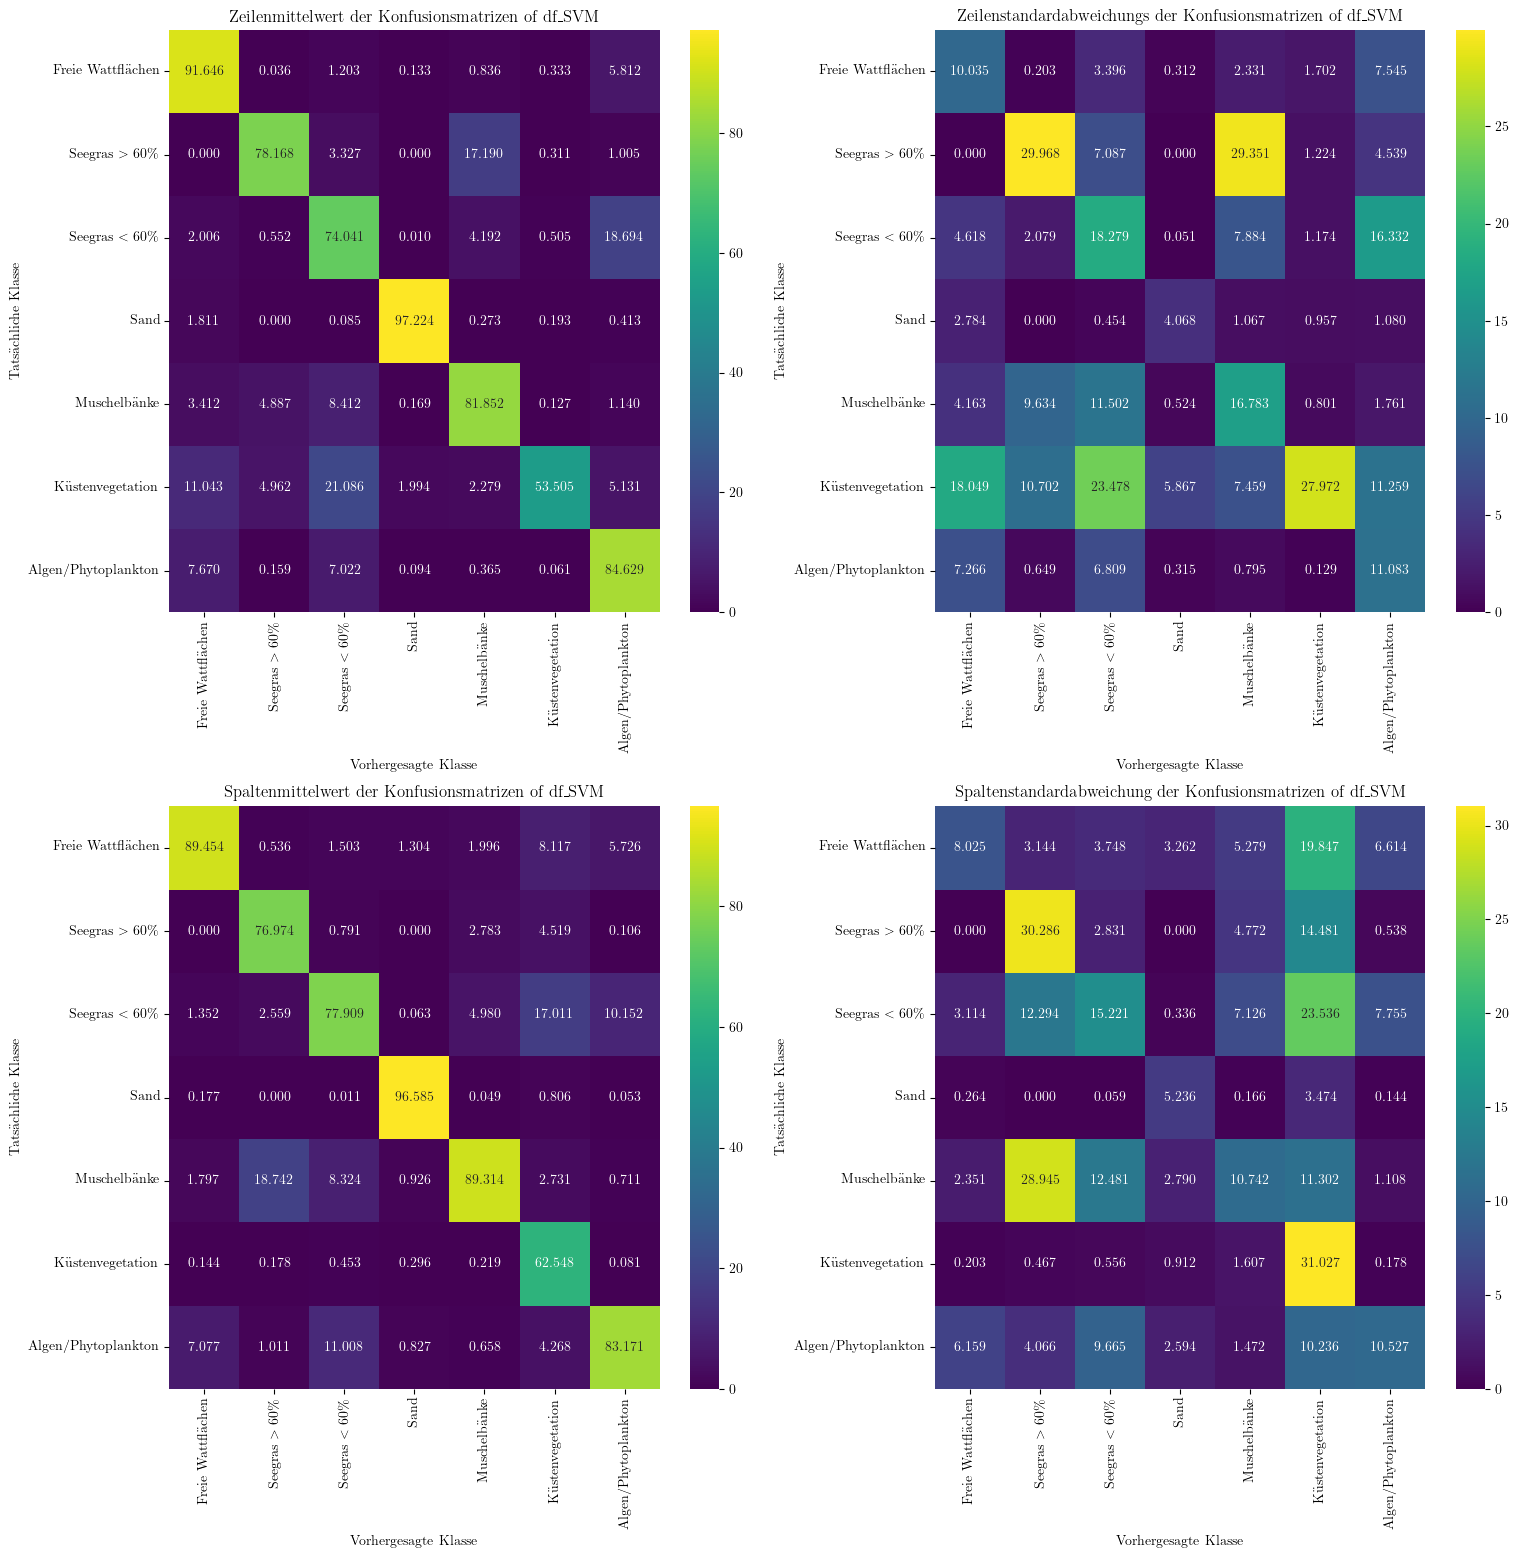

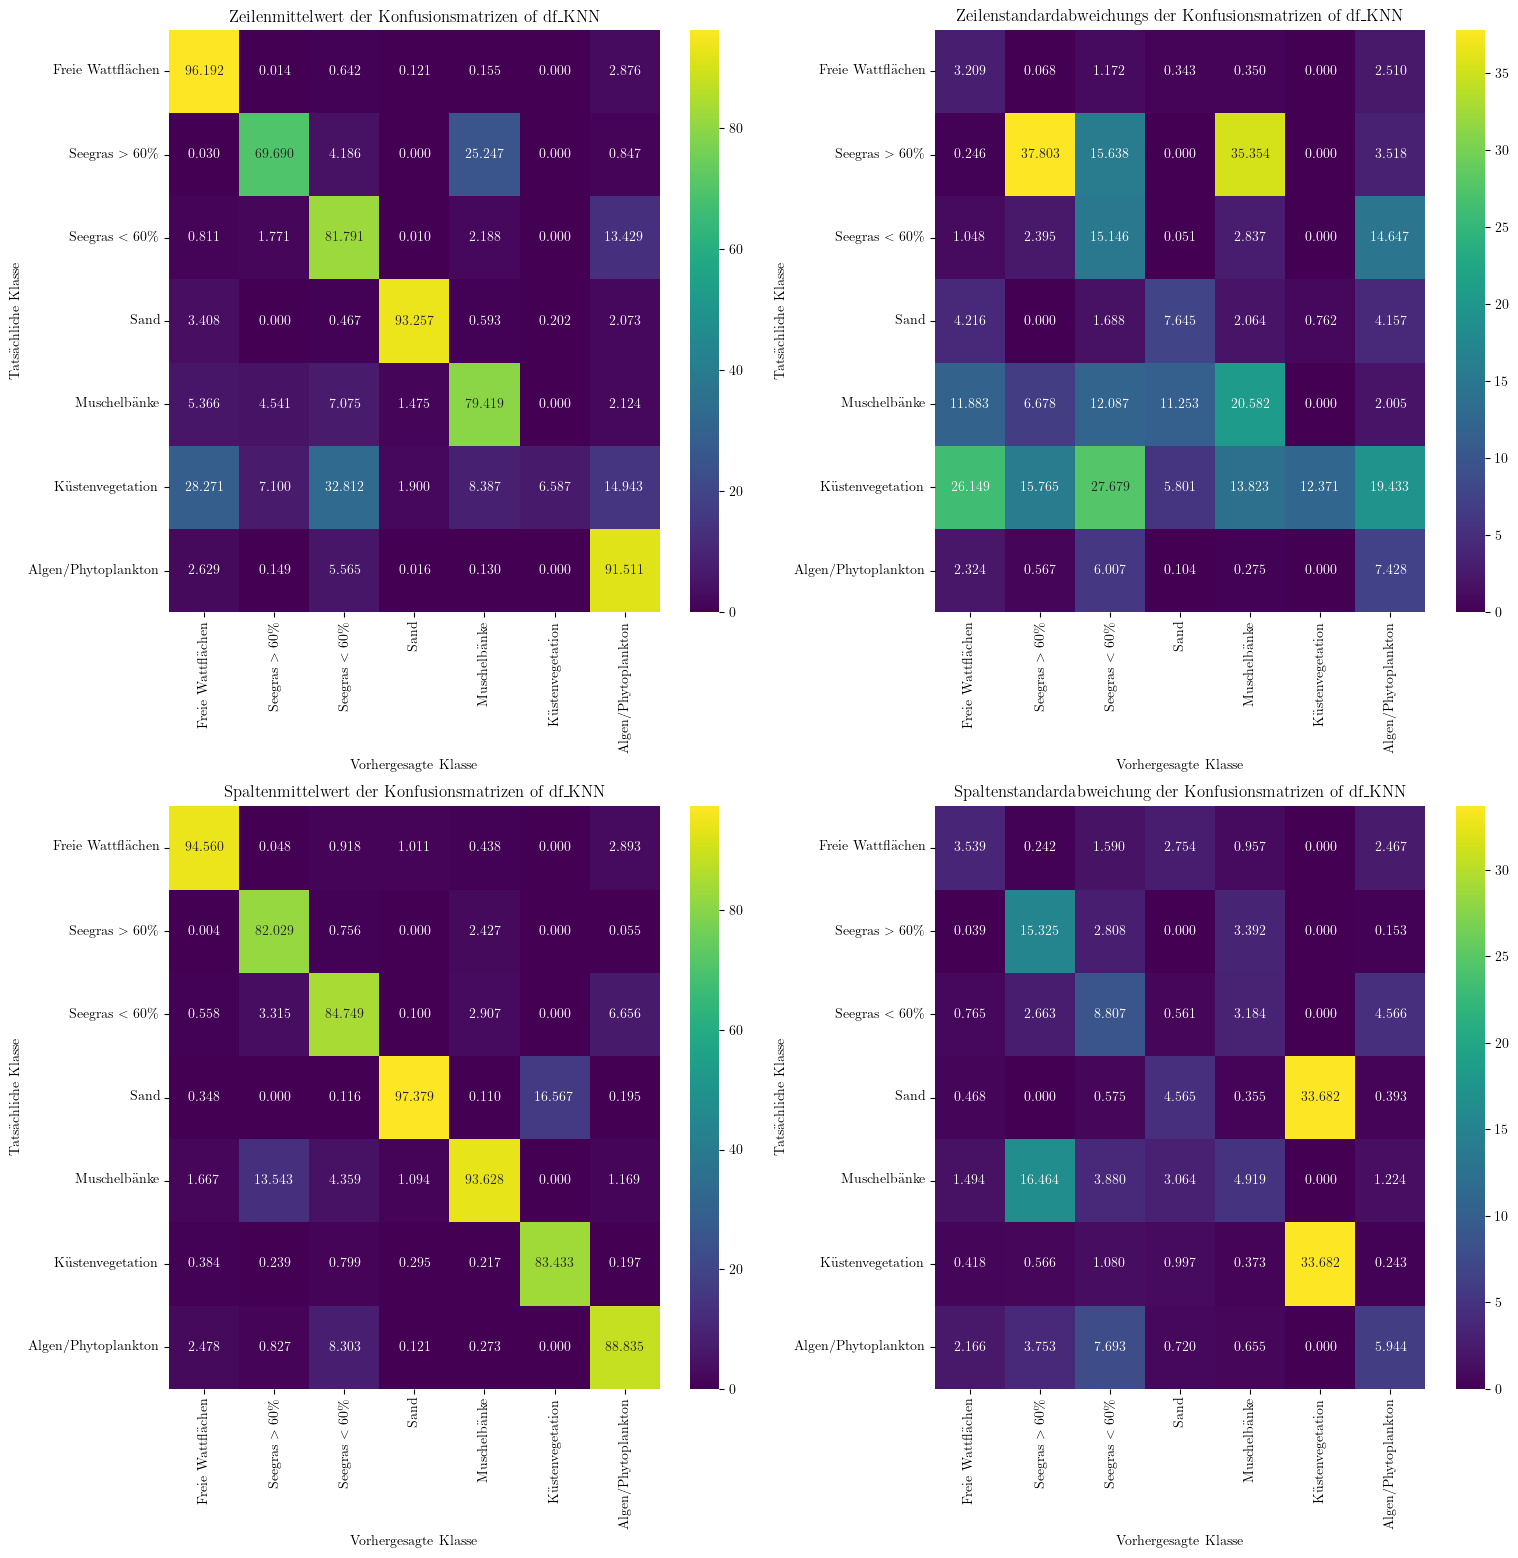

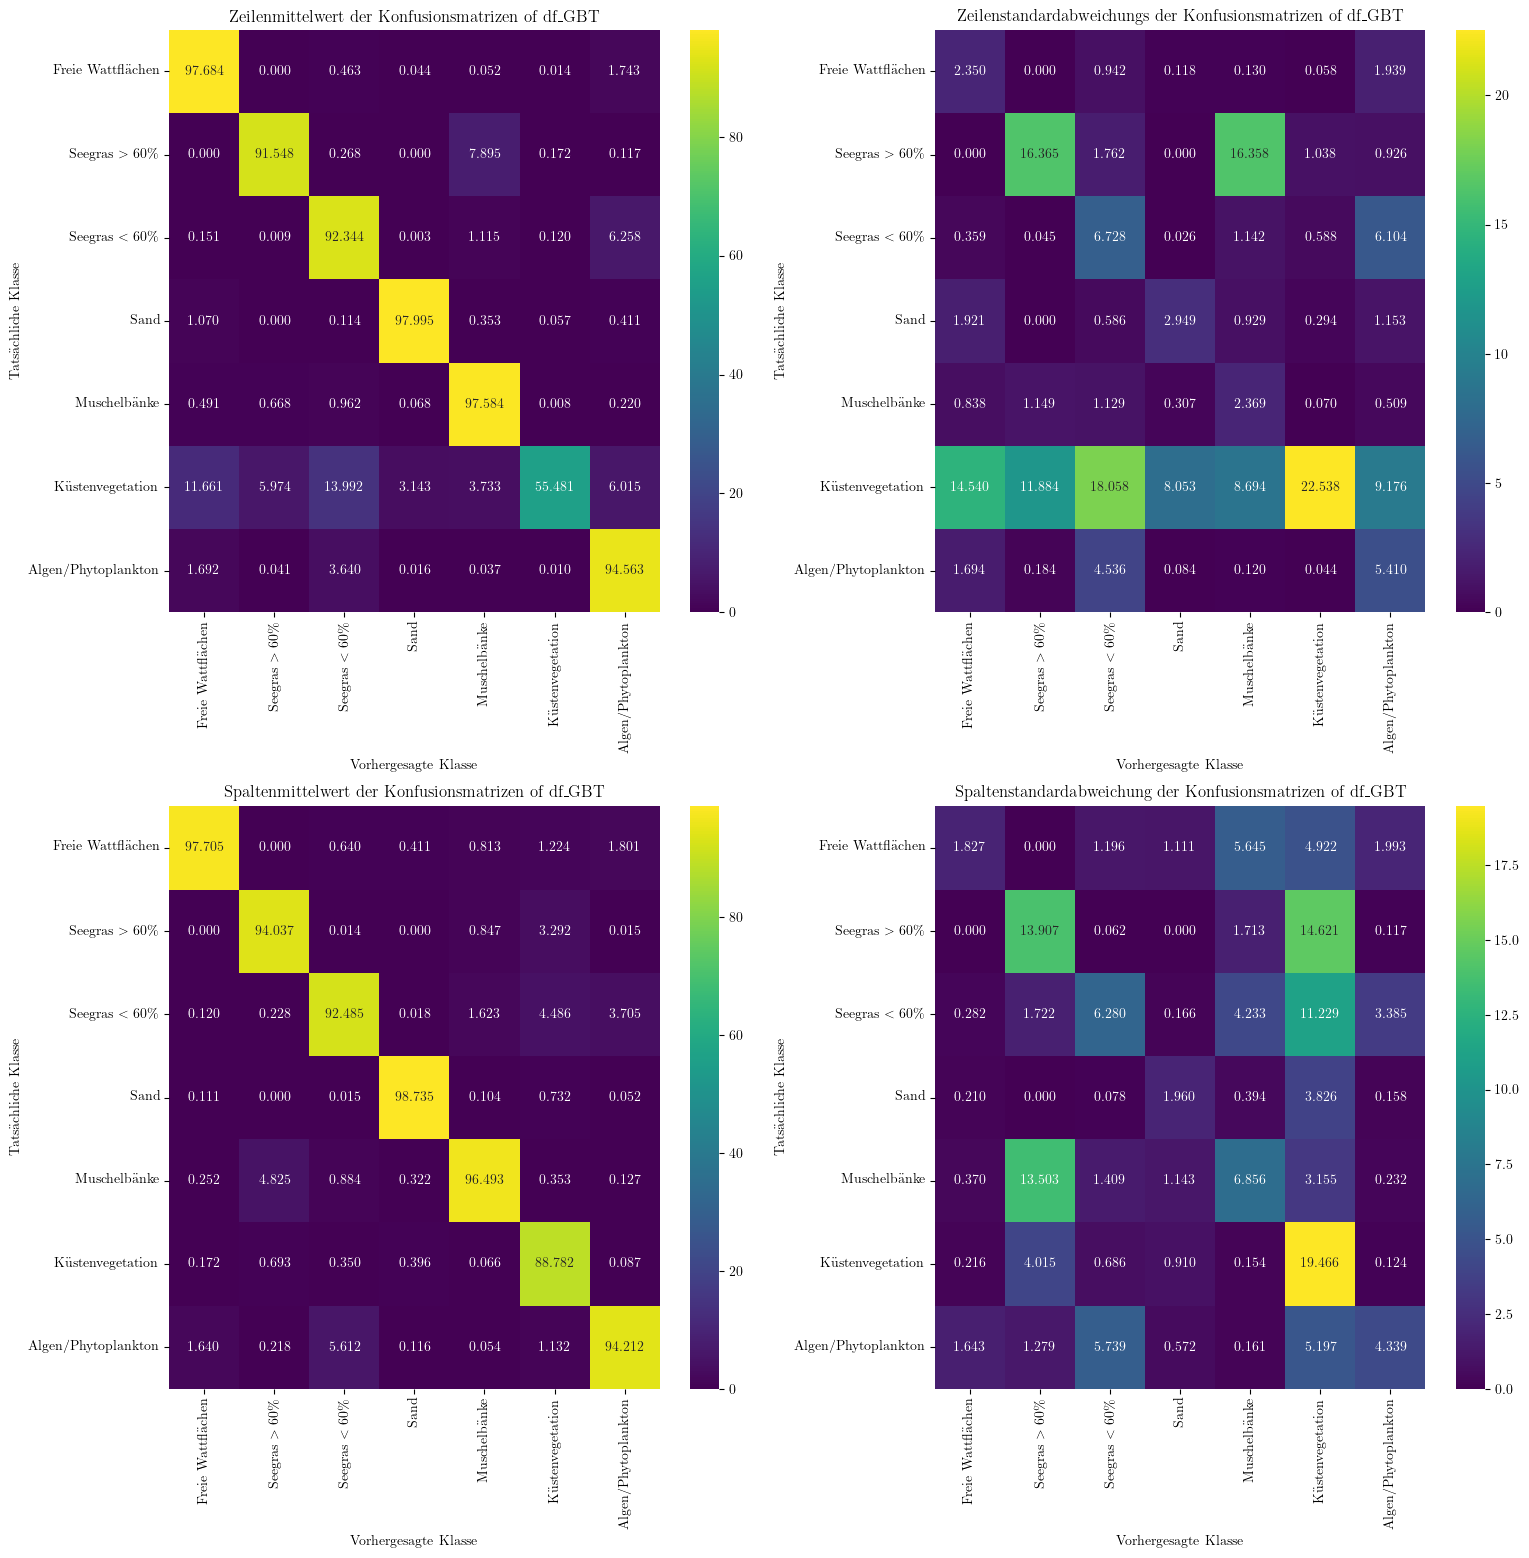

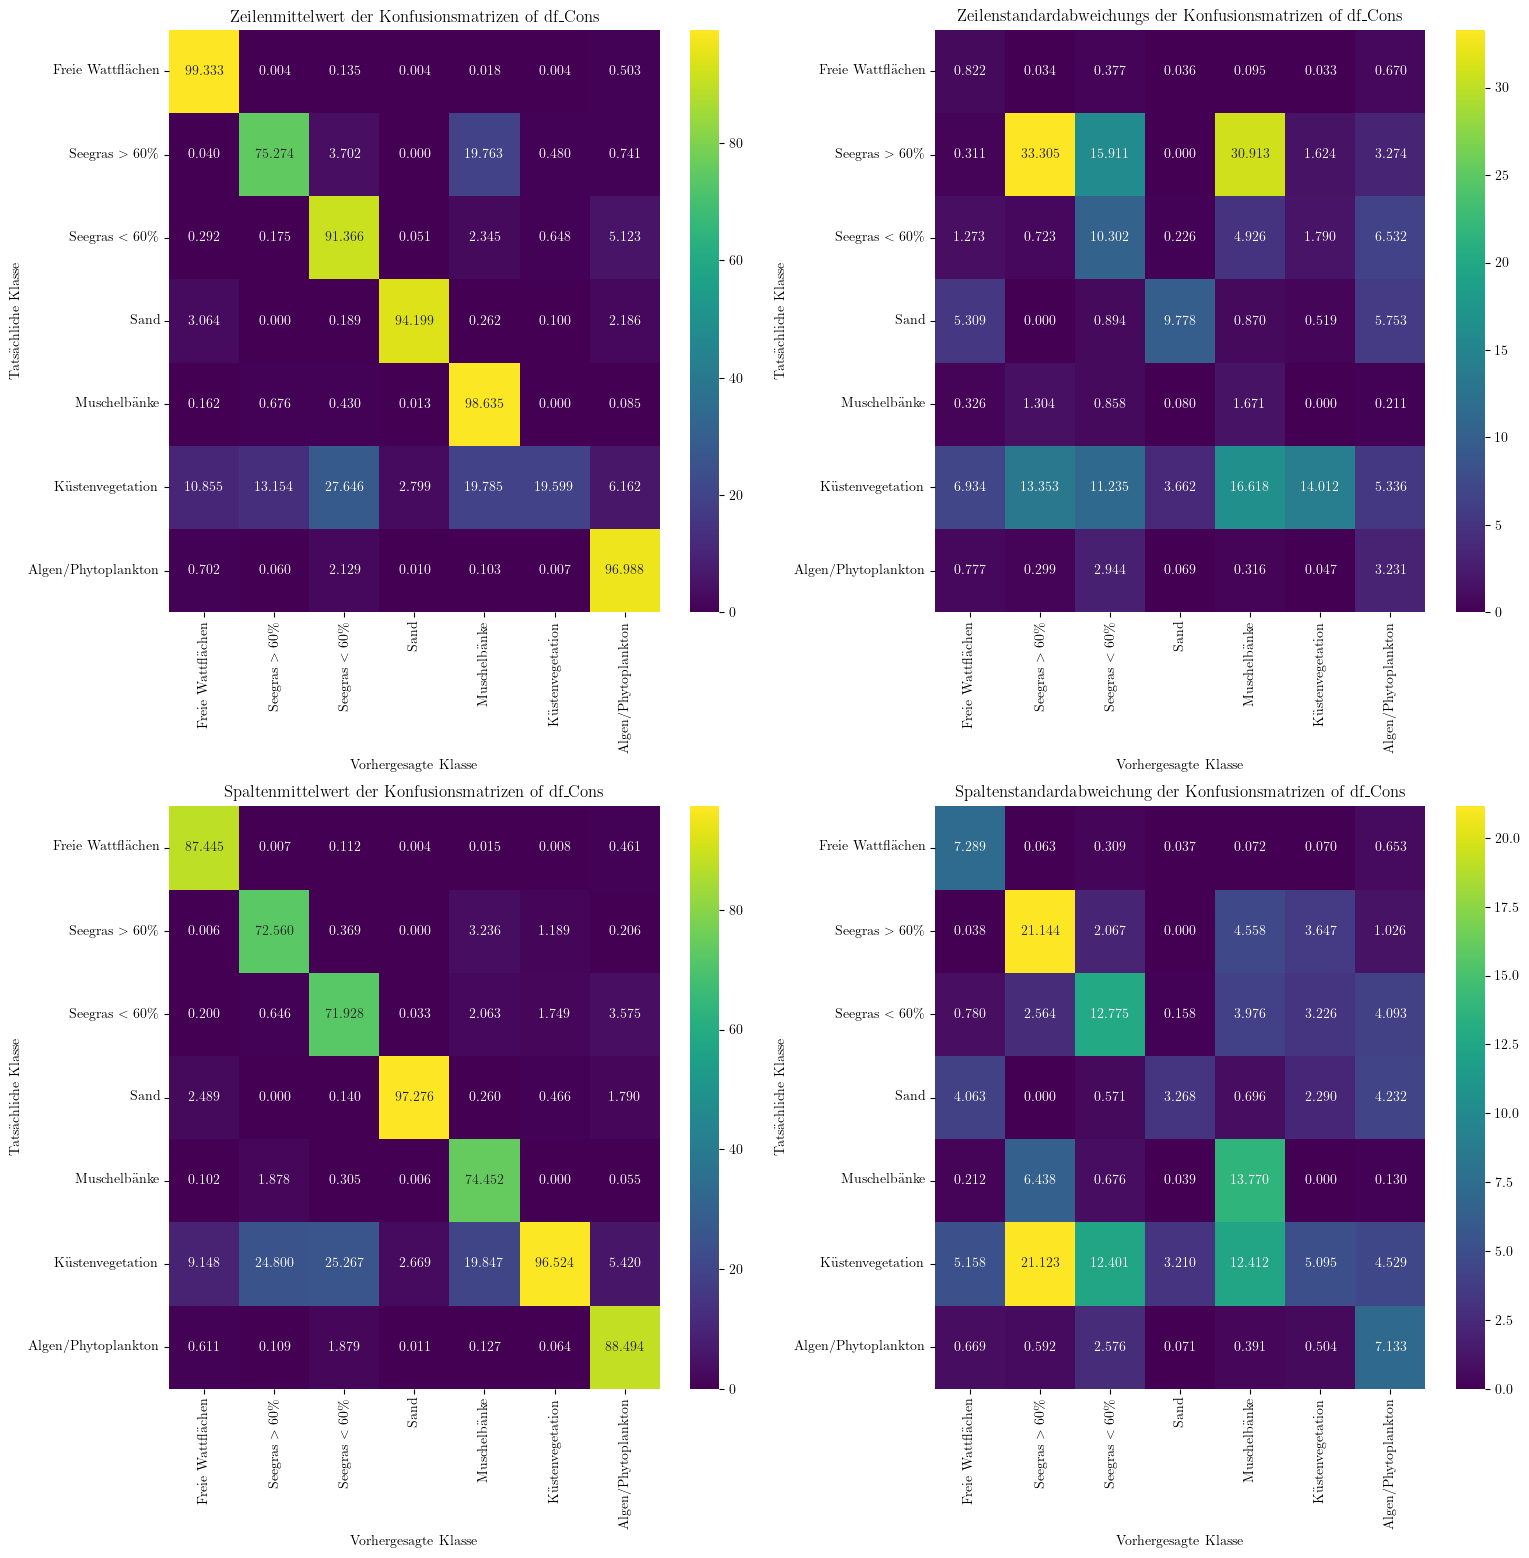

In [13]:
# call funtion
heatmaps(df)

# Get the overall row mean

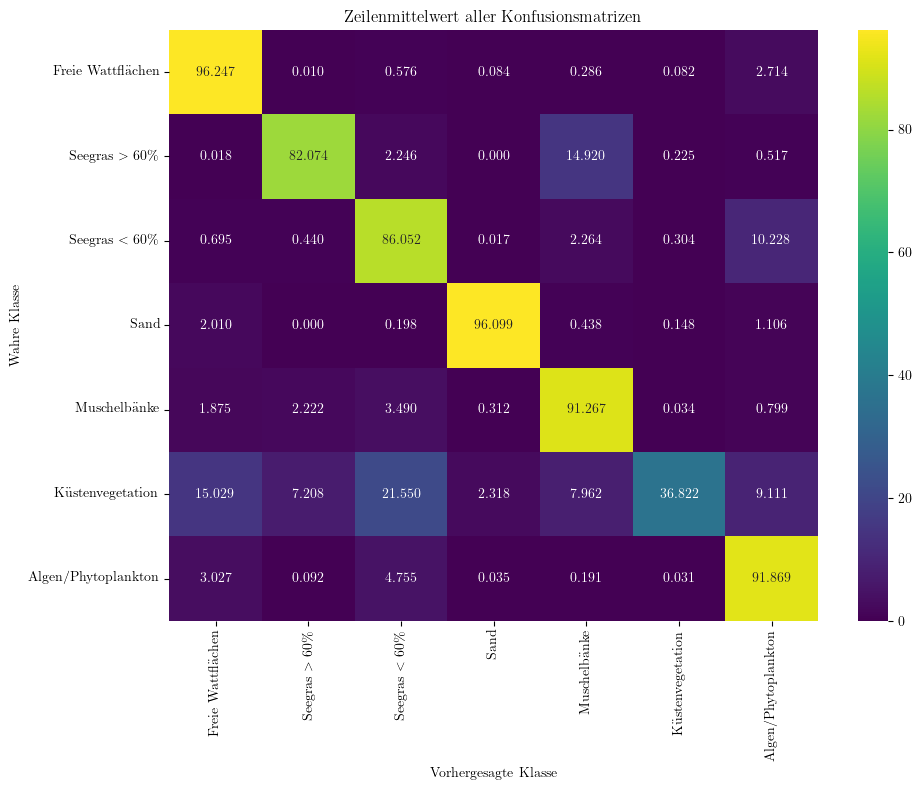

In [14]:
def calculate_row_proportions_mean(confusion_matrices):
    proportions = []

    for matrix in confusion_matrices:
        row_sums = np.sum(matrix, axis=1).reshape(-1, 1)

        with np.errstate(divide='ignore', invalid='ignore'):
            row_proportions = np.divide(matrix, row_sums, where=row_sums!=0)

        row_proportions[row_sums.flatten() == 0] = np.nan
        proportions.append(row_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

def calculate_column_proportions_mean(confusion_matrices):
    proportions = []
    for matrix in confusion_matrices:
        col_sums = np.sum(matrix, axis=0).reshape(1, -1)

        with np.errstate(divide='ignore', invalid='ignore'):
            col_proportions = np.divide(matrix, col_sums, where=col_sums!=0)

        col_proportions[:, col_sums.flatten() == 0] = np.nan
        proportions.append(col_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

mean_proportions = calculate_row_proportions_mean(confusion_matrices)

mean_proportions = 100 * mean_proportions

plt.figure(figsize=(10, 8))
sns.heatmap(mean_proportions, annot=True, cmap='viridis', fmt='.3f', cbar=True,
            xticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'], yticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'])
plt.title('Zeilenmittelwert aller Konfusionsmatrizen')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.tight_layout()
plt.savefig(r"export_path", bbox_inches='tight')
plt.show()

# Get overall column mean

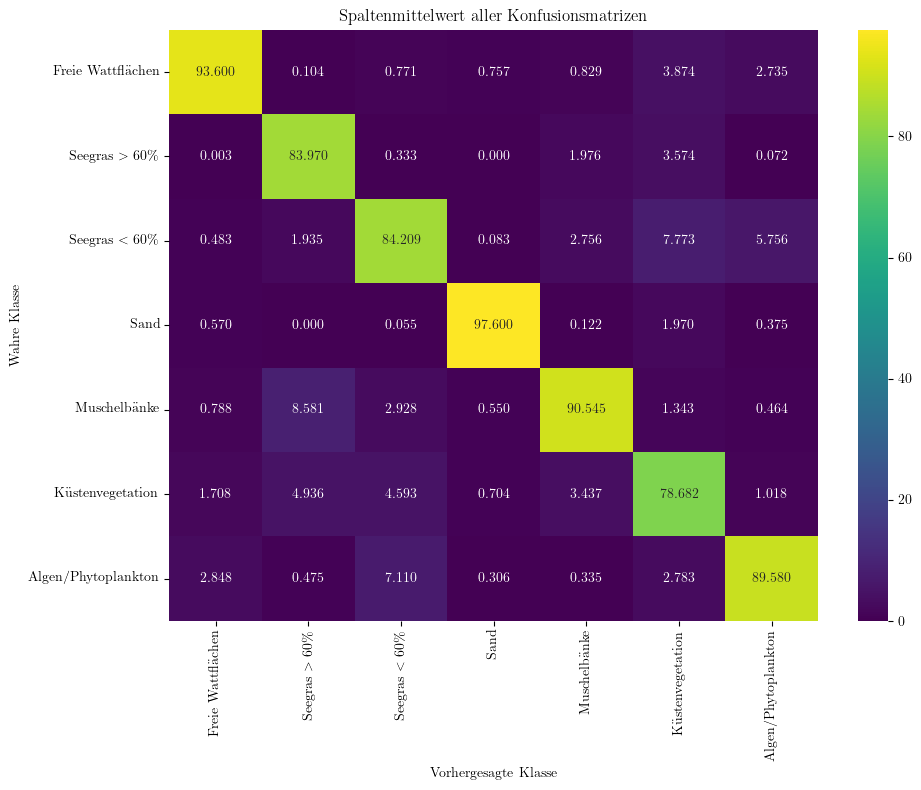

In [13]:
def calculate_row_proportions_mean(confusion_matrices):
    proportions = []

    for matrix in confusion_matrices:
        row_sums = np.sum(matrix, axis=1).reshape(-1, 1)

        with np.errstate(divide='ignore', invalid='ignore'):
            row_proportions = np.divide(matrix, row_sums, where=row_sums!=0)

        row_proportions[row_sums.flatten() == 0] = np.nan
        proportions.append(row_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

def calculate_column_proportions_mean(confusion_matrices):
    proportions = []
    for matrix in confusion_matrices:
        col_sums = np.sum(matrix, axis=0).reshape(1, -1)

        with np.errstate(divide='ignore', invalid='ignore'):
            col_proportions = np.divide(matrix, col_sums, where=col_sums!=0)

        col_proportions[:, col_sums.flatten() == 0] = np.nan
        proportions.append(col_proportions)

    proportions_array = np.array(proportions)
    mean_proportions = np.nanmean(proportions_array, axis=0)

    mean_proportions = np.nan_to_num(mean_proportions)

    return mean_proportions

mean_proportions = calculate_column_proportions_mean(confusion_matrices)

mean_proportions = 100 * mean_proportions

plt.figure(figsize=(10, 8))
sns.heatmap(mean_proportions, annot=True, cmap='viridis', fmt='.3f', cbar=True,
            xticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'], yticklabels=['Freie Wattflächen', 'Seegras $>$ 60\%', 'Seegras $<$ 60\%', 'Sand', 'Muschelbänke', 'Küstenvegetation', 'Algen/Phytoplankton'])
plt.title('Spaltenmittelwert aller Konfusionsmatrizen')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.tight_layout()
plt.savefig(r"export_path", bbox_inches='tight')
plt.show()